In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
np.random.seed(0)

# Load the store sales dataset
excel_file = pd.ExcelFile('data/store_sales.xlsx')
sheet_names = excel_file.sheet_names

# Read the data
df = pd.read_excel(excel_file, sheet_name=sheet_names[2]) # 2, 8, 9
iri_key_counts = df["IRI_KEY"].value_counts()
iri_keys = iri_key_counts[iri_key_counts > 300].index


features = ["F", "D", "Unit.Price"]
target = "Total.Volume"

df = df[df["IRI_KEY"] == iri_keys[0]]
X = df[features].values
y = df[target].values

# scaler_X = StandardScaler()
# X = scaler_X.fit_transform(X)
# scaler_y = StandardScaler()
# y = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()  # type: ignore

sheet_names, iri_keys, X.shape, y.shape

(['StoreWeekSalescarbbev_modify',
  'StoreWeekSalescigets',
  'StoreWeekSalescoffee',
  'StoreWeekSalescoldcer',
  'StoreWeekSalesdeod',
  'StoreWeekSalesdiapers',
  'StoreWeekSalesfactiss',
  'StoreWeekSalesfzdinent',
  'StoreWeekSalesfzpizza',
  'StoreWeekSaleshotdog',
  'StoreWeekSaleslaundet',
  'StoreWeekSalesmargbutr',
  'StoreWeekSalesmayo',
  'StoreWeekSalesmustketc',
  'StoreWeekSalespaptowl',
  'StoreWeekSalespeanbutr',
  'StoreWeekSalesshamp',
  'StoreWeekSalessoup',
  'StoreWeekSalesspagsauc',
  'StoreWeekSalessugarsub',
  'StoreWeekSalestoitisu',
  'StoreWeekSalestoothpa',
  'StoreWeekSalesyogurt',
  'StoreWeekSalesbeer_modify'],
 Index([6001821.0,  648368.0,  279300.0,  400003.0,  270862.0,  231720.0,
         252570.0,  659827.0,  241565.0,  237277.0,  291276.0,  273920.0,
         232633.0,  233246.0,  532639.0,  533864.0],
       dtype='float64', name='IRI_KEY'),
 (313, 3),
 (313,))

In [3]:
# # Load the Boston dataset
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22,  # type: ignore
#                      header=None)  # type: ignore
# X = np.hstack([raw_df.values[::2, :-1], raw_df.values[1::2, :2]])
# y = raw_df.values[1::2, 2].reshape(-1, 1)

# scaler_X = StandardScaler()
# X = scaler_X.fit_transform(X)
# scaler_y = StandardScaler()
# y = scaler_y.fit_transform(y).ravel()

In [4]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV


def best_estimator(model, param_grid, X, y):
    search = GridSearchCV(model, param_grid)
    search.fit(X, y)
    return search.best_estimator_

In [5]:
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import time


def evaluate_model(model, X, y, n=1, aggregate=True):
    data = []

    for random_state in range(n):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=random_state)

        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        train_time = end_time - start_time

        start_time = time.time()
        predictions = model.predict(X_test)
        end_time = time.time()
        comp_time = end_time - start_time

        r2 = r2_score(y_test, predictions)
        mae = mean_absolute_error(y_test, predictions)
        mse = mean_squared_error(y_test, predictions)
        n_iter = model.n_iter_ if hasattr(model, 'n_iter_') else 0

        data.append([r2, mae, mse, train_time, comp_time, n_iter])

    df = pd.DataFrame(
        data, columns=['r2', 'mae', 'mse', 'train_time', 'comp_time', 'n_iter'])

    return df.mean() if aggregate else df

In [6]:
from models_sklearn import Ensemble, MLP, FONN1, FONN2, TREENN1, TREENN2
from models import MLP as MLP2, FONN1 as FONN1_2, FONN2 as FONN2_2, TREENN1 as TREENN1_2, TREENN2 as TREENN2_2

ensemble_param_grid = {
}

mlp_param_grid = {
    'max_iter': [1000],
    'learning_rate': ['constant'],
    # 'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [1e2, 1e1, 1e0],
    'tol': [1e-6, 1e-4],
    'early_stopping': [True, False]
}

models = {}
# models['Tree'] = best_estimator(Ensemble(1), ensemble_param_grid, X, y)
# models['Ensemble 5'] = best_estimator(Ensemble(5), ensemble_param_grid, X, y)
# models['MLP 5'] = best_estimator(MLP(5), mlp_param_grid, X, y)
# models['FONN1 5 5'] = best_estimator(FONN1(5, (10,)), mlp_param_grid, X, y)
# models['FONN2 5 5'] = best_estimator(FONN2(5, (10,)), mlp_param_grid, X, y)
# models['TREENN1 5'] = best_estimator(TREENN1((6,)), mlp_param_grid, X, y)
# models['TREENN2 5'] = best_estimator(TREENN2((6,)), mlp_param_grid, X, y)
models['Ensemble 10'] = best_estimator(Ensemble(10), ensemble_param_grid, X, y)
models['MLP 10'] = best_estimator(MLP(10), mlp_param_grid, X, y)
models['FONN1 5 10'] = best_estimator(FONN1(5, (15,)), mlp_param_grid, X, y)
models['FONN2 5 10'] = best_estimator(FONN2(5, (15,)), mlp_param_grid, X, y)
models['TREENN1 10'] = best_estimator(TREENN1((11,)), mlp_param_grid, X, y)
models['TREENN2 10'] = best_estimator(TREENN2((11,)), mlp_param_grid, X, y)
# models['Ensemble 40'] = best_estimator(Ensemble(40), ensemble_param_grid, X, y)
# models['MLP 40'] = best_estimator(MLP(40), mlp_param_grid, X, y)
# models['FONN1 5 40'] = best_estimator(FONN1(5, (45,)), mlp_param_grid, X, y)
# models['FONN2 5 40'] = best_estimator(FONN2(5, (45,)), mlp_param_grid, X, y)
# models['TREENN1 40'] = best_estimator(TREENN1((41,)), mlp_param_grid, X, y)
# models['TREENN2 40'] = best_estimator(TREENN2((41,)), mlp_param_grid, X, y)
# models['Ensemble 100'] = best_estimator(Ensemble(100), ensemble_param_grid, X, y)
# models['MLP 100'] = best_estimator(MLP(100), mlp_param_grid, X, y)
# models['FONN1 5 100'] = best_estimator(FONN1(5, (105,)), mlp_param_grid, X, y)
# models['FONN2 5 100'] = best_estimator(FONN2(5, (105,)), mlp_param_grid, X, y)
# models['TREENN1 100'] = best_estimator(TREENN1((101,)), mlp_param_grid, X, y)
# models['TREENN2 100'] = best_estimator(TREENN2((101,)), mlp_param_grid, X, y)

# input_dim = X.shape[1]
# hidden_dim = 10
# output_dim = 1
# learning_rate = 0.005
# epochs = 2000

# models["MLP2 10"] = MLP2(input_dim, hidden_dim, output_dim,
#                          learning_rate=learning_rate, epochs=epochs)
# num_trees_input = 5
# models["FONN1_2 5 10"] = FONN1_2(input_dim, hidden_dim, output_dim, num_trees_input,
#                                  learning_rate=learning_rate, epochs=epochs)

# num_trees_hidden = 5
# models["FONN2_2 5 10"] = FONN2_2(input_dim, hidden_dim, output_dim, num_trees_hidden,
#                                  learning_rate=learning_rate, epochs=epochs)
# # models["Tree-based Predictions (FONN2)"] = models["FONN2"].trees

# models["TREENN1_2 10"] = TREENN1_2(input_dim, hidden_dim, output_dim,
#                                 learning_rate=learning_rate, epochs=epochs)
# # models["Tree-based Predictions (TREENN1)"] = models["TREENN1"].trees

# models["TREENN2_2 10"] = TREENN2_2(input_dim, hidden_dim, output_dim,
#                                 learning_rate=learning_rate, epochs=epochs)
# models["Tree-based Predictions (TREENN2)"] = models["TREENN2"].trees

/home/chess/anaconda3/envs/research/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chess/anaconda3/envs/research/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chess/anaconda3/envs/research/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chess/anaconda3/envs/research/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged ye

In [7]:
# Train and evaluate models
results = []
for name, model in models.items():
    result = evaluate_model(model, X, y, n=5).values
    results.append([name, *result])

results_df = pd.DataFrame(
    results, columns=['model', 'r2', 'mae', 'mse', 'train_time', 'comp_time', 'n_iter'])
results_df.set_index('model', inplace=True)
results_df

/home/chess/anaconda3/envs/research/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chess/anaconda3/envs/research/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chess/anaconda3/envs/research/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,r2,mae,mse,train_time,comp_time,n_iter
model,,,,,,
Ensemble 10,0.625150,181.096407,58857.695035,0.008967,0.000475,0.0
MLP 10,0.657205,177.377337,55497.568231,0.036656,0.000116,184.2
FONN1 5 10,-4.200058,618.874391,736723.211979,0.213272,0.000665,605.6
FONN2 5 10,0.665648,176.695641,53641.473837,0.097564,0.000066,94.0
TREENN1 10,-0.393551,359.660120,269063.787105,0.008138,0.000197,18.2
TREENN2 10,0.635691,186.525009,57295.347648,0.078469,0.000079,184.2


In [8]:
models.values()
# models['TREENN1 10'].coefs_

dict_values([Ensemble(n_estimators=10), MLP(hidden_layer_sizes=10, learning_rate_init=1.0, max_iter=1000, tol=1e-06), FONN1(early_stopping=True, hidden_layer_sizes=(15,), learning_rate_init=1.0,
      max_iter=1000, num_trees=5), FONN2(hidden_layer_sizes=(15,), learning_rate_init=1.0, max_iter=1000,
      num_trees=5), TREENN1(early_stopping=True, hidden_layer_sizes=(11,), learning_rate_init=1.0,
        max_iter=1000), TREENN2(hidden_layer_sizes=(11,), learning_rate_init=1.0, max_iter=1000,
        tol=1e-06)])

In [9]:
[(name, model.score(X, y)) for name, model in models.items()]

[('Ensemble 10', 0.9128817729290425),
 ('MLP 10', 0.7728670931971733),
 ('FONN1 5 10', -0.28621629106510715),
 ('FONN2 5 10', 0.7423626551090721),
 ('TREENN1 10', -2.883297489685001),
 ('TREENN2 10', 0.7690508630288249)]

In [10]:
# models['TREENN1 10'].intercepts_
models['TREENN1 10'].predict(X), models['MLP 10'].predict(X)

(array([197.42474757, 222.34874029, 222.35242045, 696.89379064,
        390.84468553, 436.62377054, 199.20878097, 308.45836346,
        193.58346177, 255.53153039, 199.20223953, 318.8418123 ,
        367.68525592, 204.94604692, 263.54675148, 188.74606962,
        257.32202075, 278.91456173, 263.57694848, 263.57429511,
        214.6175021 , 255.54204515, 224.97852289, 200.67917714,
        191.13694725, 236.07564932, 254.83242144, 174.00767902,
        178.05446325, 225.297287  , 225.29799958, 253.71235741,
        199.72228254, 236.10113775, 300.33082678, 191.1354822 ,
        171.35509981, 193.20960088, 390.89771617, 382.74355335,
        326.80057313, 442.28474589, 352.38270567, 273.01158947,
        402.02516699, 397.32301319, 313.68785813, 211.26971009,
        262.20693295, 443.86120556, 601.55602822, 298.51782175,
        186.42765093, 262.78106502, 273.14420522, 299.70835169,
        428.25931904, 314.3062368 , 397.30770785, 452.9769253 ,
        185.97110115, 389.97581609, 312.

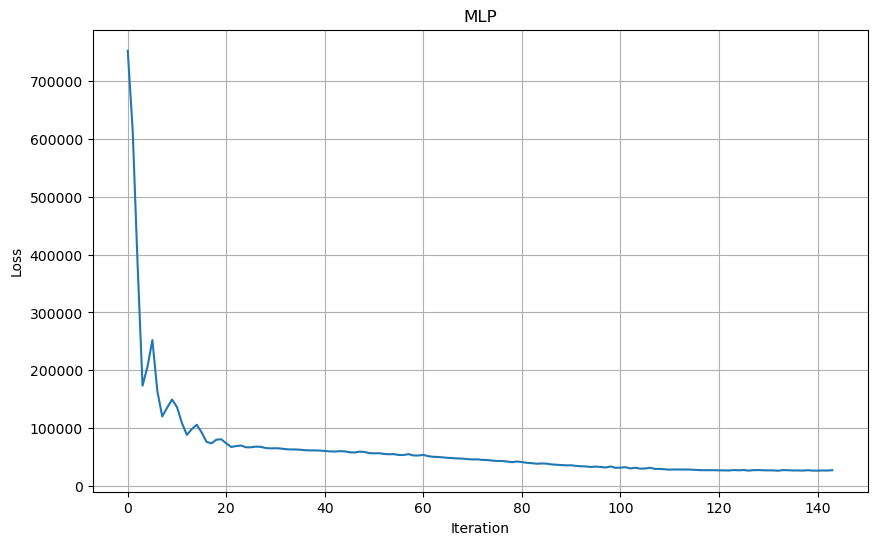

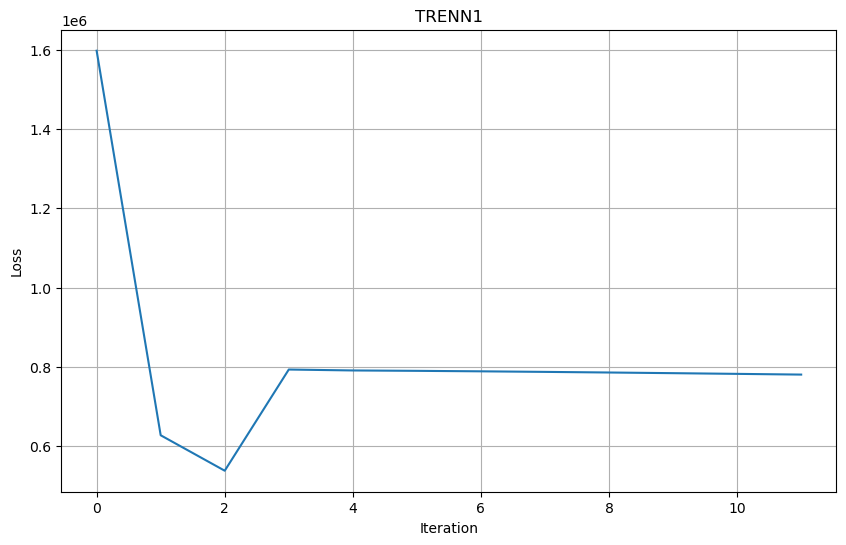

In [11]:
import matplotlib.pyplot as plt


def plot_loss(model, title='Loss Curve'):
    plt.figure(figsize=(10, 6))
    plt.plot(model.loss_curve_)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title(title)
    plt.grid()
    plt.show()


plot_loss(models['MLP 10'], 'MLP')
plot_loss(models['TREENN1 10'], 'TRENN1')